<a href="https://colab.research.google.com/github/Saisaketh20/201-L1/blob/main/WhatsApp%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import regex
import datetime

In [ ]:

def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    # date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return dateTime, author, message

In [ ]:
data = []
conversation = 'whatsapp.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([dateTime, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            dateTime, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [ ]:
data

[['19/08/2021, 13:28', 'Sai Saketh Konjerla', '<Media omitted>'],
 ['19/08/2021, 13:28', 'Sai Saketh Konjerla', '<Media omitted>'],
 ['19/08/2021, 13:28', 'Sai Saketh Konjerla', '<Media omitted>'],
 ['20/08/2021, 17:02', 'Sai Saketh Konjerla', '<Media omitted>'],
 ['20/08/2021, 17:02', 'Sai Saketh Konjerla', 'Arey dini pdf unda'],
 ['20/08/2021, 17:02', 'Vishnu', 'Haa undi raa'],
 ['20/08/2021, 17:02', 'Sai Saketh Konjerla', 'Petava'],
 ['20/08/2021, 17:02', 'Vishnu', '<Media omitted>'],
 ['20/08/2021, 17:02', 'Vishnu', 'edited'],
 ['20/08/2021, 17:02', 'Vishnu', 'name change chey'],
 ['20/08/2021, 17:03', 'Sai Saketh Konjerla', 'Haa👍'],
 ['13/10/2021, 20:26', 'Vishnu', 'Happy saddula bathukamma ra'],
 ['13/10/2021, 20:26', 'Vishnu', 'Rep rava iga aithe'],
 ['13/10/2021, 20:26', 'Sai Saketh Konjerla', 'Tq wish u the same'],
 ['13/10/2021, 20:26', 'Sai Saketh Konjerla', 'Haa ranu ra'],
 ['13/10/2021, 20:26', 'Sai Saketh Konjerla', 'Nuv'],
 ['13/10/2021, 20:26', 'Vishnu', 'Nen local e ka

In [ ]:
df = pd.DataFrame(data, columns=['dateTime', 'Author', 'Message'])
df

,dateTime,Author,Message
0,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>
1,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>
2,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>
3,"20/08/2021, 17:02",Sai Saketh Konjerla,<Media omitted>
4,"20/08/2021, 17:02",Sai Saketh Konjerla,Arey dini pdf unda
...,...,...,...
5615,"08/10/2022, 20:34",Vishnu,Areyy
5616,"08/10/2022, 20:34",Vishnu,Okasari da
5617,"08/10/2022, 20:38",Sai Saketh Konjerla,Chepp ra
5618,"08/10/2022, 20:38",Vishnu,Em led le


In [ ]:
df['dates']=pd.to_datetime(df['dateTime'])
df

,dateTime,Author,Message,dates
0,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00
1,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00
2,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00
3,"20/08/2021, 17:02",Sai Saketh Konjerla,<Media omitted>,2021-08-20 17:02:00
4,"20/08/2021, 17:02",Sai Saketh Konjerla,Arey dini pdf unda,2021-08-20 17:02:00
...,...,...,...,...
5615,"08/10/2022, 20:34",Vishnu,Areyy,2022-08-10 20:34:00
5616,"08/10/2022, 20:34",Vishnu,Okasari da,2022-08-10 20:34:00
5617,"08/10/2022, 20:38",Sai Saketh Konjerla,Chepp ra,2022-08-10 20:38:00
5618,"08/10/2022, 20:38",Vishnu,Em led le,2022-08-10 20:38:00


In [ ]:
# dw_mapping={
#     0: 'Monday', 
#     1: 'Tuesday', 
#     2: 'Wednesday', 
#     3: 'Thursday', 
#     4: 'Friday',
#     5: 'Saturday', 
#     6: 'Sunday'
# }
# df['day']=df['Date'].dt.weekday.map(dw_mapping)
# df
df['year'] = df['dates'].dt.year
df['month'] = df['dates'].dt.month_name()
df

,dateTime,Author,Message,dates,year,month
0,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August
1,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August
2,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August
3,"20/08/2021, 17:02",Sai Saketh Konjerla,<Media omitted>,2021-08-20 17:02:00,2021,August
4,"20/08/2021, 17:02",Sai Saketh Konjerla,Arey dini pdf unda,2021-08-20 17:02:00,2021,August
...,...,...,...,...,...,...
5615,"08/10/2022, 20:34",Vishnu,Areyy,2022-08-10 20:34:00,2022,August
5616,"08/10/2022, 20:34",Vishnu,Okasari da,2022-08-10 20:34:00,2022,August
5617,"08/10/2022, 20:38",Sai Saketh Konjerla,Chepp ra,2022-08-10 20:38:00,2022,August
5618,"08/10/2022, 20:38",Vishnu,Em led le,2022-08-10 20:38:00,2022,August


In [ ]:
df['date'] = df['dates'].dt.day
df

,dateTime,Author,Message,dates,year,month,date
0,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19
1,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19
2,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19
3,"20/08/2021, 17:02",Sai Saketh Konjerla,<Media omitted>,2021-08-20 17:02:00,2021,August,20
4,"20/08/2021, 17:02",Sai Saketh Konjerla,Arey dini pdf unda,2021-08-20 17:02:00,2021,August,20
...,...,...,...,...,...,...,...
5615,"08/10/2022, 20:34",Vishnu,Areyy,2022-08-10 20:34:00,2022,August,10
5616,"08/10/2022, 20:34",Vishnu,Okasari da,2022-08-10 20:34:00,2022,August,10
5617,"08/10/2022, 20:38",Sai Saketh Konjerla,Chepp ra,2022-08-10 20:38:00,2022,August,10
5618,"08/10/2022, 20:38",Vishnu,Em led le,2022-08-10 20:38:00,2022,August,10


In [ ]:
df['hour'] = df['dates'].dt.hour
df['minutes'] = df['dates'].dt.minute

In [ ]:
df

In [ ]:
df['day']=df['dates'].dt.strftime('%A')

In [ ]:
df

,dateTime,Author,Message,dates,year,month,date,hour,minutes,day,words
0,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19,13,28,Thursday,2
1,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19,13,28,Thursday,2
2,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19,13,28,Thursday,2
3,"20/08/2021, 17:02",Sai Saketh Konjerla,<Media omitted>,2021-08-20 17:02:00,2021,August,20,17,2,Friday,2
4,"20/08/2021, 17:02",Sai Saketh Konjerla,Arey dini pdf unda,2021-08-20 17:02:00,2021,August,20,17,2,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...
5615,"08/10/2022, 20:34",Vishnu,Areyy,2022-08-10 20:34:00,2022,August,10,20,34,Wednesday,1
5616,"08/10/2022, 20:34",Vishnu,Okasari da,2022-08-10 20:34:00,2022,August,10,20,34,Wednesday,2
5617,"08/10/2022, 20:38",Sai Saketh Konjerla,Chepp ra,2022-08-10 20:38:00,2022,August,10,20,38,Wednesday,2
5618,"08/10/2022, 20:38",Vishnu,Em led le,2022-08-10 20:38:00,2022,August,10,20,38,Wednesday,3


In [ ]:
df['words'] = df['Message'].apply(lambda n: len(n.split()))

In [159]:
df['Author'].value_counts().head()



Vishnu                 2924
Sai Saketh Konjerla    2630
Name: Author, dtype: int64

3

In [ ]:
user=df.Author.unique()
user
df2 = df.copy()
df2 = df2[df2.Author != "group_notification"]
top10df = df2.groupby("Author")["Message"].count().sort_values(ascending=False)
top10df

Author
Vishnu                 2924
Sai Saketh Konjerla    2630
Name: Message, dtype: int64

In [ ]:
top_user_bychat=top10df.to_dict()
top_user_bychat

{'Vishnu': 2924, 'Sai Saketh Konjerla': 2630}

In [167]:
import plotly.express as px
fig = px.histogram(y=list(top_user_bychat.values()),x=list(top_user_bychat.keys()))
fig.show()
# Here we use a column with categorical data


In [ ]:
topMedia = df[df.Message == '<Media omitted>'].groupby('Author').count().sort_values(by="Message", ascending = False).head(10)
topMedia.drop(columns=['dates','year','month','hour','date','minutes','day','words','dateTime'],inplace=True)
topMedia.rename(columns={"Message": "media_sent"}, inplace=True)
media=topMedia.to_dict()
media

{'media_sent': {'Vishnu': 149, 'Sai Saketh Konjerla': 120}}

In [ ]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]  
grouped_by_time = df3.groupby('hour').sum().sort_values(by = 'hour',ascending=True).head(24)
grouped_by_time.drop(columns=['date','year','date','minutes','words'],inplace=True)
group_time=grouped_by_time.to_dict()
group_time
df3

,dateTime,Author,Message,dates,year,month,date,hour,minutes,day,words,message_count
0,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19,13,28,Thursday,2,1
1,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19,13,28,Thursday,2,1
2,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19,13,28,Thursday,2,1
3,"20/08/2021, 17:02",Sai Saketh Konjerla,<Media omitted>,2021-08-20 17:02:00,2021,August,20,17,2,Friday,2,1
4,"20/08/2021, 17:02",Sai Saketh Konjerla,Arey dini pdf unda,2021-08-20 17:02:00,2021,August,20,17,2,Friday,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5615,"08/10/2022, 20:34",Vishnu,Areyy,2022-08-10 20:34:00,2022,August,10,20,34,Wednesday,1,1
5616,"08/10/2022, 20:34",Vishnu,Okasari da,2022-08-10 20:34:00,2022,August,10,20,34,Wednesday,2,1
5617,"08/10/2022, 20:38",Sai Saketh Konjerla,Chepp ra,2022-08-10 20:38:00,2022,August,10,20,38,Wednesday,2,1
5618,"08/10/2022, 20:38",Vishnu,Em led le,2022-08-10 20:38:00,2022,August,10,20,38,Wednesday,3,1


In [ ]:
most_active_hours={}
for i in range(0,24):
  if i in group_time['message_count'].keys():
    most_active_hours[str(i)] = group_time['message_count'][i]
  else:
    most_active_hours[str(i)] = 0
most_active_hours


{'0': 196,
 '1': 93,
 '2': 81,
 '3': 0,
 '4': 0,
 '5': 4,
 '6': 5,
 '7': 25,
 '8': 65,
 '9': 318,
 '10': 61,
 '11': 101,
 '12': 166,
 '13': 348,
 '14': 149,
 '15': 216,
 '16': 251,
 '17': 270,
 '18': 455,
 '19': 713,
 '20': 807,
 '21': 402,
 '22': 496,
 '23': 398}

In [174]:
import plotly.graph_objects as go
import numpy as np

x = list(most_active_hours.keys())
y=  list(most_active_hours.values())
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

In [ ]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
# grouped_by_day = df3.groupby('day').sum().reset_index()[['day', 'message_count']]
grouped_by_day = df3.groupby('day').sum().sort_values(by = 'day',ascending=True)
grouped_by_day.drop(columns=['hour','date','year','minutes','words'],inplace=True)
temp=grouped_by_day.to_dict()
temp


{'message_count': {'Friday': 451,
  'Monday': 910,
  'Saturday': 737,
  'Sunday': 1328,
  'Thursday': 315,
  'Tuesday': 928,
  'Wednesday': 951}}

In [ ]:
most_active_days={}
for i in days:
  if i in temp['message_count'].keys():
    most_active_days[i] = temp['message_count'][i]
most_active_days



{'Monday': 910,
 'Tuesday': 928,
 'Wednesday': 951,
 'Thursday': 315,
 'Friday': 451,
 'Saturday': 737,
 'Sunday': 1328}

In [190]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(
    r=list(most_active_days.keys()),
    theta=list(most_active_days.values()),
   # width=[20,15,10,20,15,30,15,],
   # marker_color=["#E4FF87", '#709BFF', '#709BFF', '#FFAA70', '#FFAA70', '#FFDF70', '#B6FFB4'],
   # marker_line_color="black",
    marker_line_width=2,
   opacity=0.8
))
fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0, 6]),
        angularaxis = dict()
    )
)


fig.show()

In [182]:
(most_active_days.keys())


dict_keys(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
months = ['January','February','March','April','May','June','July','August','September','October','November','Decemeber']
# grouped_by_day = df3.groupby('day').sum().reset_index()[['day', 'message_count']]
grouped_by_month = df3.groupby('month').sum().sort_values(by = 'month',ascending=True)
grouped_by_month.drop(columns=['hour','date','year','minutes','words'],inplace=True)
temp_month=grouped_by_month.to_dict()
temp_month

{'message_count': {'April': 377,
  'August': 573,
  'December': 501,
  'February': 134,
  'January': 284,
  'July': 310,
  'June': 1171,
  'March': 266,
  'May': 598,
  'November': 887,
  'October': 126,
  'September': 393}}

In [ ]:
most_active_month={}
for i in months:
  if i in temp_month['message_count'].keys():
    most_active_month[i] = temp_month['message_count'][i]
  else:
    most_active_month[i]=0
most_active_month

{'January': 284,
 'February': 134,
 'March': 266,
 'April': 377,
 'May': 598,
 'June': 1171,
 'July': 310,
 'August': 573,
 'September': 393,
 'October': 126,
 'November': 887,
 'Decemeber': 0}

In [191]:
import plotly.express as px

fig = px.bar(y=list(most_active_month.values()), x=list(most_active_month.keys()), text_auto='.2s',
            title="Controlled text sizes, positions and angles")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
!pip install emojis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import emojis
import regex
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        emojii = emojis.get(word)
        emoji_list.extend([emojis.decode(is_emoji) for is_emoji in emojii])
    return emoji_list
df3['emoji_list'] = df['Message'].apply(split_count)
df3

,dateTime,Author,Message,dates,year,month,date,hour,minutes,day,words,message_count,emoji_list
0,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19,13,28,Thursday,2,1,[]
1,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19,13,28,Thursday,2,1,[]
2,"19/08/2021, 13:28",Sai Saketh Konjerla,<Media omitted>,2021-08-19 13:28:00,2021,August,19,13,28,Thursday,2,1,[]
3,"20/08/2021, 17:02",Sai Saketh Konjerla,<Media omitted>,2021-08-20 17:02:00,2021,August,20,17,2,Friday,2,1,[]
4,"20/08/2021, 17:02",Sai Saketh Konjerla,Arey dini pdf unda,2021-08-20 17:02:00,2021,August,20,17,2,Friday,4,1,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,"08/10/2022, 20:34",Vishnu,Areyy,2022-08-10 20:34:00,2022,August,10,20,34,Wednesday,1,1,[]
5616,"08/10/2022, 20:34",Vishnu,Okasari da,2022-08-10 20:34:00,2022,August,10,20,34,Wednesday,2,1,[]
5617,"08/10/2022, 20:38",Sai Saketh Konjerla,Chepp ra,2022-08-10 20:38:00,2022,August,10,20,38,Wednesday,2,1,[]
5618,"08/10/2022, 20:38",Vishnu,Em led le,2022-08-10 20:38:00,2022,August,10,20,38,Wednesday,3,1,[]


In [ ]:
total_emojis_list = list(set([a for b in df3.emoji_list for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

54


In [ ]:
from collections import Counter
total_emojis_list = list([a for b in df3.emoji_list for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict

{':thumbsup:': 15,
 ':partying_face:': 18,
 ':smiling_face_with_three_hearts:': 9,
 ':rofl:': 12,
 ':smiling_face_with_tear:': 102,
 ':joy:': 63,
 ':smirk:': 5,
 ':kissing_heart:': 1,
 ':hot_face:': 7,
 ':fire:': 46,
 ':beers:': 1,
 ':champagne:': 1,
 ':cocktail:': 1,
 ':tumbler_glass:': 1,
 ':pensive:': 35,
 ':pleading_face:': 4,
 ':sob:': 13,
 ':grinning:': 8,
 ':slightly_smiling_face:': 13,
 ':sweat_smile:': 3,
 ':heart:': 1,
 ':raised_hands:': 1,
 ':wavy_dash:': 12,
 ':thumbsdown:': 1,
 ':pray:': 11,
 ':people_hugging:': 5,
 ':full_moon_with_face:': 11,
 ':worried:': 1,
 ':sneezing_face:': 18,
 ':cold_sweat:': 3,
 ':yawning_face:': 1,
 ':triumph:': 3,
 ':fu:': 5,
 ':sweat:': 2,
 ':fearful:': 10,
 ':question:': 1,
 ':cry:': 20,
 ':raised_eyebrow:': 1,
 ':place_of_worship:': 9,
 ':blush:': 3,
 ':sunglasses:': 2,
 ':upside_down_face:': 1,
 ':heart_eyes:': 2,
 ':unamused:': 1,
 ':monocle_face:': 2,
 ':hand_over_mouth:': 2,
 ':muscle:': 2,
 ':sleeping:': 1,
 ':older_man:': 1,
 ':tada:':

In [ ]:
emoji_final={}
for i in emoji_dict.keys():
  emoji_final[emojis.encode(i)] = emoji_dict[i] 
emoji_final

{'👍': 15,
 '🥳': 18,
 '🥰': 9,
 '🤣': 12,
 '\U0001f972': 102,
 '😂': 63,
 '😏': 5,
 '😘': 1,
 '🥵': 7,
 '🔥': 46,
 '🍻': 1,
 '🍾': 1,
 '🍸': 1,
 '🥃': 1,
 '😔': 35,
 '🥺': 4,
 '😭': 13,
 '😀': 8,
 '🙂': 13,
 '😅': 3,
 '❤️': 1,
 '🙌': 1,
 '〰️': 12,
 '👎': 1,
 '🙏': 11,
 '\U0001fac2': 5,
 '🌝': 11,
 '😟': 1,
 '🤧': 18,
 '😰': 3,
 '\U0001f971': 1,
 '😤': 3,
 '🖕': 5,
 '😓': 2,
 '😨': 10,
 '❓': 1,
 '😢': 20,
 '🤨': 1,
 '🛐': 9,
 '😊': 3,
 '😎': 2,
 '🙃': 1,
 '😍': 2,
 '😒': 1,
 '🧐': 2,
 '🤭': 2,
 '💪': 2,
 '😴': 1,
 '👴': 1,
 '🎉': 2,
 '💅': 2,
 '🦊': 2,
 '🕺': 1,
 '☺️': 2}

In [199]:
emoji_per_user={}
l = df3.Author.unique()
for i in range(len(l)):
  dummy_df = df3[df3['Author'] == l[i]]
  total_emojis = list([emojis.encode(a) for b in dummy_df.emoji_list for a in b])
  emoji_dict_individual = dict(Counter(total_emojis))
  emoji_per_user[l[i]]=(emoji_dict_individual)
del emoji_per_user[None]
emoji_per_user


{'Sai Saketh Konjerla': {'👍': 10,
  '🥰': 6,
  '😂': 43,
  '😘': 1,
  '🔥': 14,
  '🥳': 11,
  '🍻': 1,
  '🍾': 1,
  '🍸': 1,
  '🥃': 1,
  '😔': 35,
  '🥺': 1,
  '😭': 7,
  '😀': 5,
  '❤️': 1,
  '😟': 1,
  '🤧': 18,
  '😰': 3,
  '😤': 3,
  '\U0001f972': 19,
  '😓': 2,
  '🙏': 6,
  '❓': 1,
  '\U0001fac2': 4,
  '🙃': 1,
  '🙂': 7,
  '🌝': 1,
  '😍': 1,
  '🧐': 2,
  '🤭': 2,
  '😢': 3},
 'Vishnu': {'🥳': 7,
  '🤣': 12,
  '\U0001f972': 83,
  '😂': 20,
  '😏': 5,
  '🥵': 7,
  '🔥': 32,
  '🙂': 6,
  '😅': 3,
  '👍': 4,
  '🙌': 1,
  '🙏': 5,
  '\U0001fac2': 1,
  '🌝': 10,
  '😭': 6,
  '🥺': 3,
  '\U0001f971': 1,
  '🖕': 5,
  '😨': 10,
  '😢': 17,
  '🤨': 1,
  '🛐': 9,
  '😊': 3,
  '😎': 2,
  '🥰': 3,
  '😍': 1,
  '😒': 1,
  '💪': 2,
  '😴': 1,
  '😀': 3,
  '👴': 1,
  '🎉': 2,
  '💅': 2,
  '🦊': 2,
  '🕺': 1,
  '☺️': 2}}

In [224]:
dum = emoji_per_user['Sai Saketh Konjerla']
dum
import operator
real = (dict(sorted(dum.items(), key=operator.itemgetter(1), reverse=True)[:10]))

In [225]:

import plotly.graph_objects as go
labels = list(real.keys())
values = list(real.values())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',insidetextorientation='radial')])
fig.show()

In [ ]:
!pip install emoji
import emoji
words=[]
df_wordcloud = df.copy()
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df_wordcloud['Message']=df_wordcloud['Message'].apply(remove_urls)
for mess in df_wordcloud['Message']:
    if(mess=='<Media omitted>'):
      continue
    else:
      words.extend(mess.split())

print(words)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['Arey', 'dini', 'pdf', 'unda', 'Haa', 'undi', 'raa', 'Petava', 'edited', 'name', 'change', 'chey', 'Haa👍', 'Happy', 'saddula', 'bathukamma', 'ra', 'Rep', 'rava', 'iga', 'aithe', 'Tq', 'wish', 'u', 'the', 'same', 'Haa', 'ranu', 'ra', 'Nuv', 'Nen', 'local', 'e', 'kada', 'Osta', 'Haa', 'avnu', 'le', 'Meedi', 'ekada', 'Mancherial', 'ra', 'Ohh', 'Sri', 'Chaitanya', 'na', 'School', 'Ha', 'avnu', 'ra', 'Shanmai', 'telsa', 'Shanmai', 'thota', 'Emo', 'ra', 'telvad', 'Okk', 'Photo', 'chuste', 'gurtupadutanu', 'kavach', 'Ohh', 'o', 'Ok', 'Campus', 'li', '1000', 'members', 'ra', 'Vammo', 'nen', 'mancherial', 'ante', 'chinna', 'school', 'anukunna', 'raa', 'Town', 'la', 'pillalu', 'andar', 'Chaitanya', 'ne', 'na', 'Arey', 'nadi', 'chaitanya', 'hyd', 'ra', 'Mancherial', 'kadu', 'Ohh', 'ok', 'Maa', 'frnd', 'mancherial', 'Chaitanya', 'raa', 'Okk', 'neeku', 'telvad', 'Achaa', 'Haa', 'telvad', 'ra', 'Okk',

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
nostops=[]
for w in words:
    if w not in stop_words:
        nostops.append(w)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nostops

['Arey',
 'dini',
 'pdf',
 'unda',
 'Haa',
 'undi',
 'raa',
 'Petava',
 'edited',
 'name',
 'change',
 'chey',
 'Haa👍',
 'Happy',
 'saddula',
 'bathukamma',
 'ra',
 'Rep',
 'rava',
 'iga',
 'aithe',
 'Tq',
 'wish',
 'u',
 'Haa',
 'ranu',
 'ra',
 'Nuv',
 'Nen',
 'local',
 'e',
 'kada',
 'Osta',
 'Haa',
 'avnu',
 'le',
 'Meedi',
 'ekada',
 'Mancherial',
 'ra',
 'Ohh',
 'Sri',
 'Chaitanya',
 'na',
 'School',
 'Ha',
 'avnu',
 'ra',
 'Shanmai',
 'telsa',
 'Shanmai',
 'thota',
 'Emo',
 'ra',
 'telvad',
 'Okk',
 'Photo',
 'chuste',
 'gurtupadutanu',
 'kavach',
 'Ohh',
 'Ok',
 'Campus',
 'li',
 '1000',
 'members',
 'ra',
 'Vammo',
 'nen',
 'mancherial',
 'ante',
 'chinna',
 'school',
 'anukunna',
 'raa',
 'Town',
 'la',
 'pillalu',
 'andar',
 'Chaitanya',
 'ne',
 'na',
 'Arey',
 'nadi',
 'chaitanya',
 'hyd',
 'ra',
 'Mancherial',
 'kadu',
 'Ohh',
 'ok',
 'Maa',
 'frnd',
 'mancherial',
 'Chaitanya',
 'raa',
 'Okk',
 'neeku',
 'telvad',
 'Achaa',
 'Haa',
 'telvad',
 'ra',
 'Okk',
 'Happy',
 'Bir

In [209]:
from collections import Counter
word_cloud = Counter(nostops)
word_cloud

Counter({'Arey': 221,
         'dini': 3,
         'pdf': 5,
         'unda': 16,
         'Haa': 449,
         'undi': 62,
         'raa': 69,
         'Petava': 1,
         'edited': 1,
         'name': 12,
         'change': 11,
         'chey': 50,
         'Haa👍': 2,
         'Happy': 4,
         'saddula': 1,
         'bathukamma': 1,
         'ra': 736,
         'Rep': 29,
         'rava': 2,
         'iga': 33,
         'aithe': 31,
         'Tq': 3,
         'wish': 1,
         'u': 5,
         'ranu': 2,
         'Nuv': 39,
         'Nen': 87,
         'local': 1,
         'e': 57,
         'kada': 107,
         'Osta': 2,
         'avnu': 4,
         'le': 74,
         'Meedi': 3,
         'ekada': 8,
         'Mancherial': 2,
         'Ohh': 46,
         'Sri': 1,
         'Chaitanya': 3,
         'na': 56,
         'School': 1,
         'Ha': 127,
         'Shanmai': 2,
         'telsa': 8,
         'thota': 1,
         'Emo': 42,
         'telvad': 18,
         'Okk': 5,


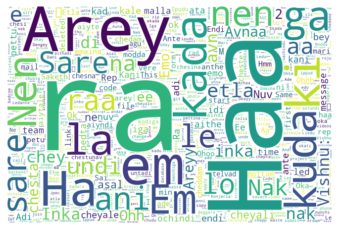

In [212]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def makeImage(text):
    alice_mask = np.array(Image.open("background.jpg"))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

makeImage(word_cloud)

In [214]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [215]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [216]:
pd.options.mode.chained_assignment = None 
df_sent = df[df.Message != '<Media omitted>']
df_sent = df_sent[df_sent['Message'].map(len) > 10]
df_sent.drop(columns=['dates','year','month','hour','date','minutes','day','words','dateTime'],inplace=True)
df_sent

,Author,Message
4,Sai Saketh Konjerla,Arey dini pdf unda
5,Vishnu,Haa undi raa
9,Vishnu,name change chey
11,Vishnu,Happy saddula bathukamma ra
12,Vishnu,Rep rava iga aithe
...,...,...
5609,Sai Saketh Konjerla,Team members mottam
5610,Vishnu,Me val andaru assemble ainara
5611,Sai Saketh Konjerla,Okkakadu okkakati
5614,Vishnu,Arey badxow


In [221]:
df_sent['Negative']=df_sent['Message'].map(lambda text: sentiment.polarity_scores(text)["neg"])
df_sent['Neutral']=df_sent['Message'].map(lambda text: sentiment.polarity_scores(text)["neu"])
df_sent['Positive']=df_sent['Message'].map(lambda text: sentiment.polarity_scores(text)["pos"])
df_sent['Compound']=df_sent['Message'].map(lambda text: sentiment.polarity_scores(text)["compound"])
df_sent

,Author,Message,Negative,Neutral,Positive,Compound
4,Sai Saketh Konjerla,Arey dini pdf unda,0.0,1.000,0.000,0.0000
5,Vishnu,Haa undi raa,0.0,1.000,0.000,0.0000
9,Vishnu,name change chey,0.0,1.000,0.000,0.0000
11,Vishnu,Happy saddula bathukamma ra,0.0,0.448,0.552,0.5719
12,Vishnu,Rep rava iga aithe,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...
5609,Sai Saketh Konjerla,Team members mottam,0.0,1.000,0.000,0.0000
5610,Vishnu,Me val andaru assemble ainara,0.0,1.000,0.000,0.0000
5611,Sai Saketh Konjerla,Okkakadu okkakati,0.0,1.000,0.000,0.0000
5614,Vishnu,Arey badxow,0.0,1.000,0.000,0.0000


In [218]:
hf = df_sent.sort_values(by = ["Negative"])
hf = hf.tail(5)
neg = hf["Message"].tolist()
print("The top 5 Negative words in the chat are:")
neg
    

The top 5 Negative words in the chat are:


['Waste mokapdi',
 'Waste management',
 'Stress tisukoku',
 'Veree kadara 🔥🔥🔥🔥',
 '🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥']

In [219]:
hf = df_sent.sort_values(by = ["Positive"])
hf = hf.tail(5)
p = hf["Message"].tolist()
print("The top 5 Positive words in the chat are:")
p

The top 5 Positive words in the chat are:


['My special thanks daggara',
 'Divine cake',
 'Happy Dussehra',
 'Best option',
 'Congratulations 🎉🎉']

In [220]:
hf = df_sent.sort_values(by = ["Neutral"])
hf = hf.tail(5)
neu = hf["Message"].tolist()
print("The top 5 Neutral words in the chat are:")
neu

The top 5 Neutral words in the chat are:


['Em kanabadutundu',
 'Ante nek emaina ochinda',
 'This message was deleted',
 'Kakapothe app la ostale',
 'Harshith gad matladindu ga']